In [30]:
import numpy as np
import matplotlib.pyplot as plt

### helper functions

In [111]:
def normalise(v):
    return v/np.linalg.norm(v.flatten())

def vec(*args):
    return np.array(args).reshape(len(args), 1)

def proj(P, x):
    return np.dot(P, x)

def proj_basis(A, x):
    p = np.zeros(x.shape).flatten()
    num_cols = A.shape[1]
    for j in range(num_cols):
        p += np.dot(A[:, j], x.flatten())*A[:, j]
    return p
        
def draw_vector(ax, direction, position, color):
    vec1 = np.vstack((position.flatten(), position.flatten()+3.0*direction.flatten()))
    plt.plot(vec1[:, 0], vec1[:, 1], color=color, linewidth=2)
    
def draw_point(ax, point, color=[0, 0, 0]):
    ax.scatter(point[0], point[1], 40, color)

if $u$ is a unit vector then any point $x$ projected by $P = uu^{T}$ will be a on its the line defined by $u$. 

In [96]:
u = normalise(vec(1., 1.))
P = np.dot(u, np.transpose(u))
proj(P, vec(6, 3))

array([[4.5],
       [4.5]])

### Projection

If $u_1, ..., u_k$ is an orthonormal basis vectors arranged as columns in matrix $A = [u_1, ..., u_k]$ then the projection is given by $P_A = AA^{T}$. Which in the case when $A$ is square and orthonormal $AA^{T} = A^{T}A = I$ and $A = A^{-1}$

A: 
[[ 0.71 -0.71]
 [ 0.71  0.71]]
P: 
[[ 1. -0.]
 [-0.  1.]]
proj:   [-2. -1.]
proj_b: [-2. -1.]


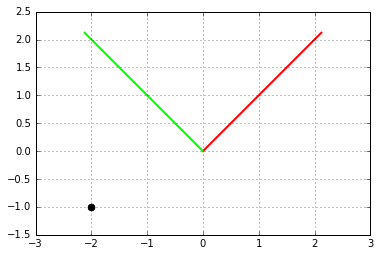

In [118]:
u1 = normalise(vec(1., 1.))
u2 = normalise(vec(-1., 1.))

A = np.hstack((u1, u2))
P = np.dot(A, np.transpose(A))

x = vec(-2., -1.)
x_proj = proj(P, x)
x_proj2 = proj_basis(A, x)

print('A: \n{}'.format(np.round(A, 2)))
print('P: \n{}'.format(np.round(P, 2)))
print('proj:   {}'.format(np.round(x_proj.flatten(), 2)))
print('proj_b: {}'.format(np.round(x_proj2, 2)))

plt.figure()
ax = plt.gca()
draw_vector(ax, u1, vec(0, 0), [1, 0, 0, 1])
draw_vector(ax, u2, vec(0, 0), [0, 1, 0, 1])
draw_point(ax, x_proj, [0, 1, 0])
draw_point(ax, x, [0, 0, 0])
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.grid()
plt.axis('equal')
plt.show()

### Projection matrix of a non-orthonormal basis